### [Save and restore models](https://www.tensorflow.org/tutorials/keras/save_and_restore_models)

In [1]:
!pip install -q h5py pyyaml
!pip install -q tf_nightly

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.12.0


#### Load the dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

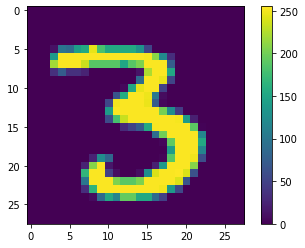

In [5]:
plt.figure()
plt.imshow(train_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images = test_images[:1000].reshape(-1, 28*28) / 255.0

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

#### Define a model

In [7]:
def buil_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation=tf.keras.activations.relu, input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])
    
    model.compile(optimizer=tf.train.AdamOptimizer(),
                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])
    
    return model

In [8]:
model = buil_model()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Checkpoint callback usage

In [10]:
checkpoint_path = './checkpoints/t_1/cp.ckpt'

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [12]:
model = buil_model()

In [13]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 896/1000 [=========================>....] - ETA: 0s - loss: 1.1942 - acc: 0.6339
Epoch 00001: saving model to ./checkpoints/t_1/cp.ckpt
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1383 - acc: 0.6530 - val_loss: 0.7151 - val_acc: 0.7680
Epoch 2/10
 832/1000 [=======================>......] - ETA: 0s - loss: 0.4295 - acc: 0.8750
Epoch 00002: saving model to ./checkpoints/t_1/cp.ckpt
1000/1000 [==============================] - 1s 758us/step - loss: 0.4144 - acc: 0.8810 - val_loss: 0.5304 - val_acc: 0.8300
Epoch 3/10
 960/1000 [===========================>..] - ETA: 0s - loss: 0.2933 - acc: 0.9167
Epoch 00003: saving model to ./checkpoints/t_1/cp.ckpt
1000/1000 [==============================] - 1s 795us/step - loss: 0.2965 - acc: 0.9140 - val_loss: 0.4708 - val_acc: 0.8590
Epoch 4/10
 896/1000 [=========================>....] - ETA: 0s - loss: 0.2143 - acc: 0.9442
Epoch 00004: saving model to ./checkpoints

#### Rebuild the new model

In [14]:
model = buil_model()

In [15]:
loss, acc = model.evaluate(test_images, test_labels)

1000/1000 [==============================] - 0s 404us/step


In [16]:
print('Untrained model, accuracy: {}'.format(acc))

Untrained model, accuracy: 0.061


#### Load the weights from the checkpoint and re-evaluate

In [17]:
model.load_weights(checkpoint_path)

In [18]:
loss, acc = model.evaluate(test_images, test_labels)

1000/1000 [==============================] - 0s 131us/step


In [19]:
print('Restored model, accuracy: {}'.format(acc))

Restored model, accuracy: 0.87


#### Checkpoint callback options

Train a model, and save uniquely named checkpoints once every 5-epochs.

In [20]:
checkpoint_path = './checkpoints/t_2/cp-{epoch:04d}.ckpt'

In [21]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_weights_only=True, period=5)

In [22]:
model = buil_model()

In [23]:
model.save_weights(checkpoint_path.format(epoch=0))

In [24]:
model.fit(train_images, train_labels, epochs=50, callbacks=[cp_callback], validation_data=(test_images, test_labels), verbose=1)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1682 - acc: 0.6720 - val_loss: 0.6926 - val_acc: 0.7990
Epoch 2/50
1000/1000 [==============================] - 1s 630us/step - loss: 0.4020 - acc: 0.8870 - val_loss: 0.5299 - val_acc: 0.8350
Epoch 3/50
1000/1000 [==============================] - 1s 526us/step - loss: 0.2657 - acc: 0.9430 - val_loss: 0.4734 - val_acc: 0.8570
Epoch 4/50
1000/1000 [==============================] - 1s 571us/step - loss: 0.1970 - acc: 0.9530 - val_loss: 0.4306 - val_acc: 0.8600
Epoch 5/50
 992/1000 [============================>.] - ETA: 0s - loss: 0.1459 - acc: 0.9708
Epoch 00005: saving model to ./checkpoints/t_2/cp-0005.ckpt
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1454 - acc: 0.9710 - val_loss: 0.4173 - val_acc: 0.8620
Epoch 6/50
1000/1000 [==============================] - 1s 526us/step - loss: 0.1056 - acc: 0.9800 - val_loss: 0.4069 - val_acc: 0.868

#### Reset and evaluate model using latest checkpoint

In [25]:
latest = tf.train.latest_checkpoint('./checkpoints/t_2/')
latest

'./checkpoints/t_2/cp-0050.ckpt'

In [26]:
model = buil_model()

In [27]:
model.load_weights(latest)

In [28]:
loss, acc = model.evaluate(test_images, test_labels)

1000/1000 [==============================] - 0s 348us/step


In [29]:
print('Restored model, accuracy: {}'.format(acc))

Restored model, accuracy: 0.878


#### Manually save weights

In [30]:
model.save_weights('./checkpoints/manual_ckpt/')

In [31]:
model = buil_model()

In [32]:
model.load_weights('./checkpoints/manual_ckpt/')

In [33]:
loss, acc = model.evaluate(test_images, test_labels)

1000/1000 [==============================] - 1s 513us/step


In [34]:
print('Restored model, accuracy: {}'.format(acc))

Restored model, accuracy: 0.878


#### Save the entire model

As an HDF5 file

In [35]:
model = buil_model()

In [36]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 1s 819us/step - loss: 1.1631 - acc: 0.6550
Epoch 2/5
1000/1000 [==============================] - 0s 346us/step - loss: 0.4285 - acc: 0.8780
Epoch 3/5
1000/1000 [==============================] - 0s 329us/step - loss: 0.2859 - acc: 0.9270
Epoch 4/5
1000/1000 [==============================] - 0s 386us/step - loss: 0.2152 - acc: 0.9480
Epoch 5/5
1000/1000 [==============================] - 0s 420us/step - loss: 0.1553 - acc: 0.9660


In [37]:
model.save('./saved_models/model.h5')

In [38]:
new_model = keras.models.load_model('./saved_models/model.h5')

In [39]:
# Since the optimizer is not saved as part of the model save file, we have to compile it again!

new_model.compile(optimizer=tf.train.AdamOptimizer(),
                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])

In [40]:
loss, acc = new_model.evaluate(test_images, test_labels)

1000/1000 [==============================] - 1s 527us/step


In [41]:
print('Restored model, accuracy: {}'.format(acc))

Restored model, accuracy: 0.855
